In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# RoBERTa

In [2]:
with open('run-metrics-roberta-base.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8980025053024292, 'full_set_var_values': [0.04482906311750412, 0.039884280413389206, 0.03169308602809906, 0.027907313778996468, 0.025220295414328575, 0.02330113761126995, 0.022792628034949303, 0.0194107498973608, 0.018278632313013077, 0.01663162000477314, 0.015545649453997612, 0.013401452451944351, 0.012814326211810112, 0.012555957771837711, 0.01156114973127842, 0.011108013801276684, 0.01060487050563097, 0.009991820901632309, 0.009790664538741112, 0.009214677847921848, 0.008950229734182358, 0.008375688455998898, 0.008317716419696808, 0.007897605188190937, 0.007595664355903864, 0.007337720133364201, 0.0070480359718203545, 0.006952623371034861, 0.006645721383392811, 0.006595470942556858, 0.006302056834101677, 0.006221166346222162, 0.0060545396991074085, 0.005912508815526962, 0.005736500956118107, 0.005545713007450104, 0.005422290414571762, 0.00534049142152071, 0.00530272675678134, 0.005182892084121704, 0.005122673232108355, 0.005050983745604753

In [3]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']
subset_sizes = modelling_metrics['subset_size']

In [4]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [5]:
file_list = glob.glob('./Eval-Results-roberta-base/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [6]:
results = {}

In [7]:
results['subset_size'] = modelling_metrics['subset_size']
results['r2_value'] = variance_metrics['r2_values']
results['test_accuracy'] = modelling_metrics['test_accuracies']
results['test_loss'] = modelling_metrics['test_losses']

In [8]:
subset_sizes = modelling_metrics['subset_size']

for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [9]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value,test_accuracy,test_loss,sst2_loss,sst2_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy
0,2500,0.887049,0.88180,0.328703,0.344351,0.860473,0.782964,0.681265,0.224530,0.913211
1,5000,0.893088,0.88252,0.275712,0.335143,0.852010,0.643258,0.662969,0.277022,0.879053
2,7500,0.895190,0.89428,0.269622,0.378327,0.826857,0.681977,0.648131,0.244752,0.900947
3,10000,0.896257,0.89220,0.257556,0.368519,0.834459,0.624868,0.680400,0.248905,0.911605
4,12500,0.897007,0.90108,0.261697,0.420387,0.814622,0.594228,0.726536,0.255291,0.887184
5,15000,0.897355,0.89912,0.264669,0.442472,0.820220,0.729240,0.663293,0.227611,0.909763
6,17500,0.897684,0.90104,0.264572,0.400656,0.835469,0.639599,0.723511,0.247850,0.890316
7,20000,0.897845,0.89888,0.251786,0.369458,0.835365,0.629579,0.688000,0.239456,0.897632
8,22500,0.898088,0.90020,0.279906,0.378775,0.848431,0.668847,0.707772,0.234045,0.905605
9,25000,0.898246,0.90496,0.255814,0.431549,0.822521,0.594432,0.743391,0.260168,0.882368


In [10]:
results_df['mean_odd_accuracy'] = results_df[['sst2_accuracy', 'tweet_eval_accuracy', 'yelp_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['sst2_loss', 'tweet_eval_loss', 'yelp_loss']].mean(axis=1)
results_df

,subset_size,r2_value,test_accuracy,test_loss,sst2_loss,sst2_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy,mean_odd_accuracy,mean_odd_loss
0,2500,0.887049,0.88180,0.328703,0.344351,0.860473,0.782964,0.681265,0.224530,0.913211,0.818316,0.450615
1,5000,0.893088,0.88252,0.275712,0.335143,0.852010,0.643258,0.662969,0.277022,0.879053,0.798010,0.418475
2,7500,0.895190,0.89428,0.269622,0.378327,0.826857,0.681977,0.648131,0.244752,0.900947,0.791978,0.435019
3,10000,0.896257,0.89220,0.257556,0.368519,0.834459,0.624868,0.680400,0.248905,0.911605,0.808822,0.414097
4,12500,0.897007,0.90108,0.261697,0.420387,0.814622,0.594228,0.726536,0.255291,0.887184,0.809448,0.423302
5,15000,0.897355,0.89912,0.264669,0.442472,0.820220,0.729240,0.663293,0.227611,0.909763,0.797759,0.466441
6,17500,0.897684,0.90104,0.264572,0.400656,0.835469,0.639599,0.723511,0.247850,0.890316,0.816432,0.429368
7,20000,0.897845,0.89888,0.251786,0.369458,0.835365,0.629579,0.688000,0.239456,0.897632,0.806999,0.412831
8,22500,0.898088,0.90020,0.279906,0.378775,0.848431,0.668847,0.707772,0.234045,0.905605,0.820603,0.427223
9,25000,0.898246,0.90496,0.255814,0.431549,0.822521,0.594432,0.743391,0.260168,0.882368,0.816094,0.428716


[(0.87, 0.9)]

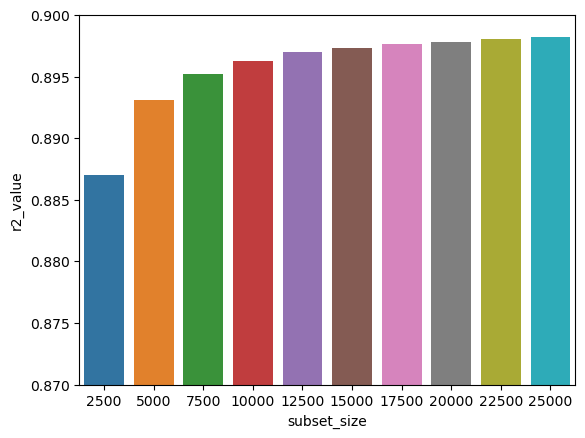

In [11]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['r2_value'])
plot.set(ylim=(0.87, 0.9))

[(0.7, 0.9)]

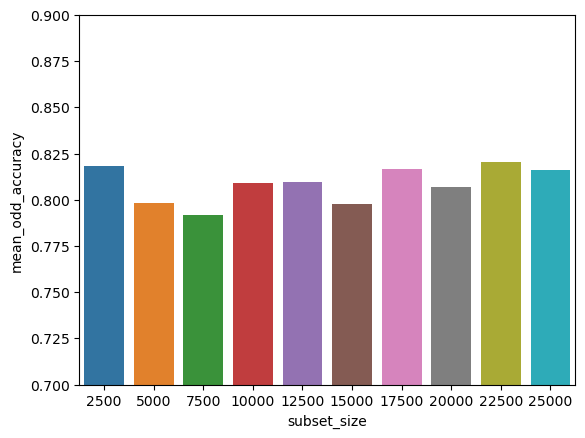

In [12]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'])
plot.set(ylim=(0.7, 0.9))

[(0.4, 0.6)]

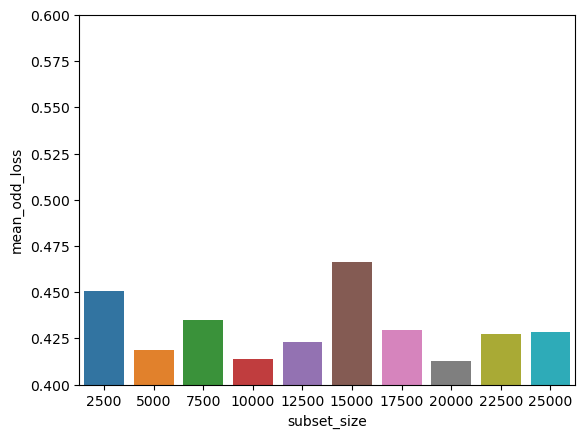

In [13]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])
plot.set(ylim=(0.4, 0.6))

[(0.4, 0.9)]

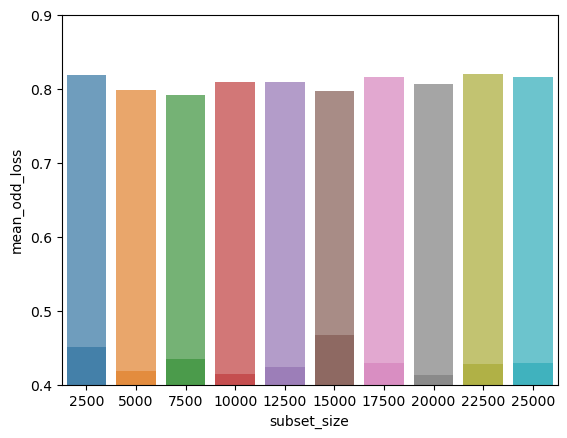

In [14]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.9))


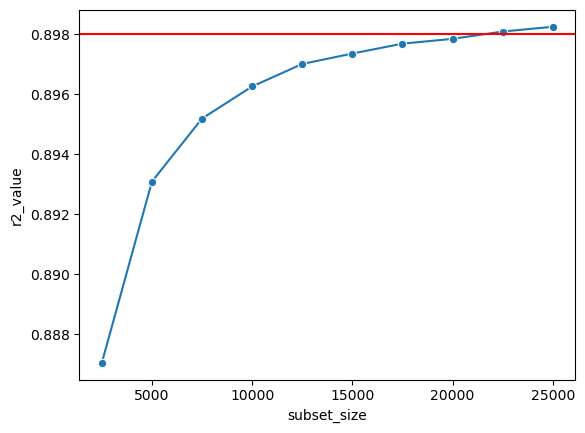

In [15]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')

<Axes: xlabel='subset_size', ylabel='sst2_accuracy'>

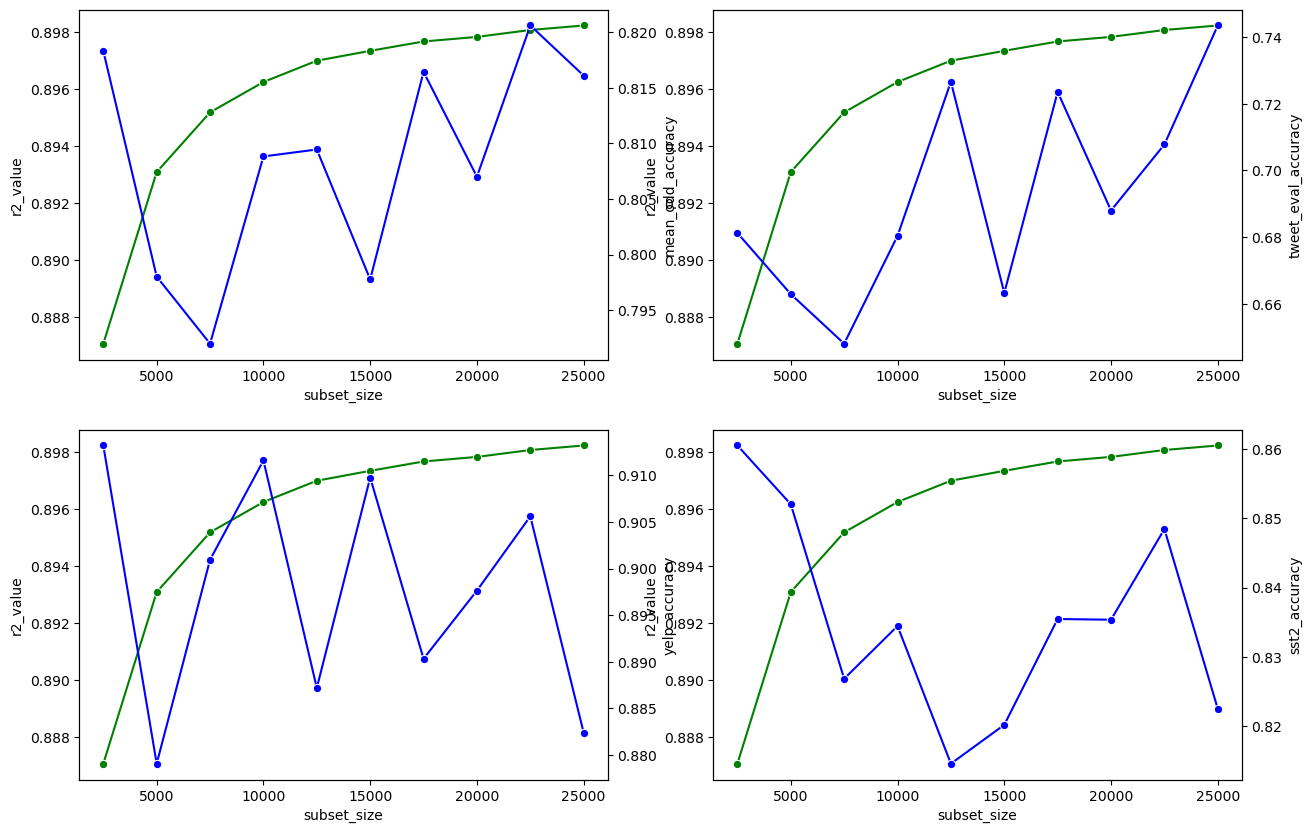

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][0], marker="o")
ax1 = axes[0][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], color="b", ax=ax1, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][1], marker="o")
ax2 = axes[0][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['tweet_eval_accuracy'], color="b", ax=ax2, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][0], marker="o")
ax3 = axes[1][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['yelp_accuracy'], color="b", ax=ax3, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][1], marker="o")
ax4 = axes[1][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['sst2_accuracy'], color="b", ax=ax4, marker="o")